# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

In [2]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

In [4]:
# image predictions URL provided by Udacity
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(link)
with open(link.split('/')[-1], mode='wb') as file:
    file.write(r.content)

image_pre = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# keep track of tweets provided by Udacity that have been deleted
failed_tweet = []
with open('tweet-json.txt', mode='w', encoding='utf-8') as file:
    for tweet_id in tweet_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            tweet_json = json.dumps(tweet._json)
            # write tweet JSON data line by line
            file.write(tweet_json + '\n')
        except:
            failed_tweet.append(tweet_id)

In [6]:
df_list = []
with open('tweet-data.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    # read tweet JSON data line by line
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
tweet_data = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



The first thing I do is a visual assessment of the data.

In [7]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
image_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


Now that I have looked through the data and become familiar with it, I will assess each data frame with code. 

In [10]:
#look at the data types for the tweet_archive df
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

I'm curious about the exapnded_urls column is so I am going to look at that.

In [11]:
tweet_archive['expanded_urls'].sample(5)

709     https://twitter.com/dog_rates/status/785170936...
1522    https://twitter.com/dog_rates/status/690649993...
2106    https://twitter.com/dog_rates/status/670468609...
1705    https://twitter.com/dog_rates/status/680836378...
410     https://twitter.com/dog_rates/status/823322678...
Name: expanded_urls, dtype: object

These are just extra links associated with various tweets. There are missing values in this column but that is ok because it makes sense for not all tweets to have extra links associated with them.

In [12]:
#look at which column has the retweet info
len(tweet_archive[
    tweet_archive['retweeted_status_id'].notnull()
    & tweet_archive['retweeted_status_user_id'].notnull()
    & tweet_archive['retweeted_status_timestamp'].notnull()
])

181

In [13]:
#Look at the name column to make sure all names look like dog names
tweet_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
the          8
Sadie        8
Bailey       7
an           7
Daisy        7
Buddy        7
Toby         7
Stanley      6
Bella        6
Jax          6
Koda         6
Rusty        6
Dave         6
Leo          6
Milo         6
Jack         6
Oscar        6
Scout        6
Louis        5
          ... 
Orion        1
Georgie      1
Ito          1
Gabby        1
Crimson      1
Buckley      1
Trigger      1
Samsom       1
Biden        1
Rinna        1
Stefan       1
Sobe         1
Ralphus      1
Lenox        1
Mosby        1
Trip         1
Adele        1
Rilo         1
Hamrick      1
Banditt      1
Mike         1
Augie        1
Kaiya        1
Tedders      1
Butters      1
Chef         1
Dex          1
Obi          1
Katie        1
Izzy         1
Name: name, Length: 957, dtype: int64

In [14]:
#Make sure all data types in the image_pre file make sense.
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#Look at the descriptive stats for the image_pre file
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


I noticed that the P1 column had a max value of 1. Let's take a deeper look at this row.

In [16]:
image_pre.query('p1_conf+p2_conf+p3_conf > 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


### Quality issues
1. In the tweet_archive file, there are dog names "None", "a", "such". These do not seem like dog names. The "None" names should be changed to NaN.

2. In the tweet_archive file, the timestamp column has a type of non-null object and the tweet_id is a float. I will change both of these to their correct data type. Timestamp should be datetime and tweet_id should be an object.

3. The dog stages (doggo, pupper, puppo) should be categorical data type not objects.

4. expanded_urls has missing values. When I look at a sample of this column it's unclear what these links are for and many of them seem to be broken. I will remove this column.

5. There are 181 retweets in the data set. I will remove these.

6. Some of the predictions in the image_pre file are not dog related.

7. The tweet_archive file has columns with info on retweets (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp). Once those retweets have been removed I will remove this column.

8. In the image_pre file, there is one row that has a confidence interval of 1 in the P1 column but none of the predictions are dogs.

### Tidiness issues
1. In the tweet_archive file, the dog types (doggo, fluffer, etc.) each have their own column. We can create one column that will hold this info.

2. In the image_pre file, the predictions for each image are spread out over multiple columns. It should be one column called "predictions" and additional column for the confidence and dog. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
clean_tweet_data = tweet_data.copy()
clean_image_pre = image_pre.copy()
clean_tweet_archive = tweet_archive.copy()

### Issue #1: Dog with names "None", "a", "such"

#### Define:

Remove any incorrect values in the name column in archive_clean by extracting any name after the phrase "named".  After examining the text I will create a dictionary for those names with the corrections that need to be made. I will then change any remaining lowercase names or "None" with NaN.

#### Code

In [18]:
import numpy as np
#to extract dogs with multiple names
clean_tweet_archive['named'] = clean_tweet_archive['text'].str.extract('named ([A-Z][a-z]*(\s[A-Z][a-z]*)*)')[0]

In [19]:
# replace cells with dog names
clean_tweet_archive.loc[clean_tweet_archive['named'].notnull(), 'name'] = clean_tweet_archive[clean_tweet_archive['named'].notnull()]['named']

In [20]:
clean_tweet_archive.drop('named', axis=1, inplace=True)

In [21]:
# print data associated with lowercase names that contains 'we only rate dogs'
with pd.option_context('display.max_rows', None):
    print(clean_tweet_archive[
        clean_tweet_archive['name'].str.contains(r'^[^A-Z].*$')
        & ~clean_tweet_archive['text'].str.contains(r'[Ww]e only rate dogs')
    ][['text']])

                                                   text
22    I've yet to rate a Venezuelan Hover Wiener. Th...
56    Here is a pupper approaching maximum borkdrive...
335   There's going to be a dog terminal at JFK Airp...
369   Occasionally, we're sent fantastic stories. Th...
649   Here is a perfect example of someone who has t...
682   RT @dog_rates: Say hello to mad pupper. You kn...
822   RT @dog_rates: This is just downright precious...
852   This is my dog. Her name is Zoey. She knows I'...
924   This is one of the most inspirational stories ...
988   What jokester sent in a pic without a dog in i...
992   That is Quizno. This is his beach. He does not...
993   This is one of the most reckless puppers I've ...
1002  This is a mighty rare blue-tailed hammer sherk...
1004  Viewer discretion is advised. This is a terrib...
1025  This is an Iraqi Speed Kangaroo. It is not a d...
1040  This is actually a pupper and I'd pet it so we...
1049  This is a very rare Great Alaskan Bush Pup

In [22]:
# use a dictionary to capture names
dname_dict = {247: 'Grace', 560: 'Zoey', 1629: 'Daryl'}

In [23]:
for index, name in dname_dict.items():
    clean_tweet_archive.iloc[index, 9] = name

In [24]:
# replace lowercase names with 'NaN'
clean_tweet_archive.loc[clean_tweet_archive['name'].str.contains(r'^[^A-Z].*$'), 'name'] = np.nan

In [25]:
# replace 'None' with 'NaN'
clean_tweet_archive.loc[clean_tweet_archive['name']=='None', 'name'] = np.nan

#### Test

In [26]:
clean_tweet_archive['name'].value_counts()

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Lola       10
Tucker     10
Penny      10
Bo          9
Winston     9
Sadie       8
Daisy       7
Bailey      7
Toby        7
Buddy       7
Stanley     6
Oscar       6
Rusty       6
Scout       6
Jack        6
Jax         6
Leo         6
Koda        6
Dave        6
Bella       6
Milo        6
Gus         5
Louis       5
Larry       5
Sammy       5
Bentley     5
           ..
Gabby       1
Crimson     1
Simba       1
Keet        1
Brian       1
Shiloh      1
Ivar        1
Lenox       1
Kaiya       1
Mosby       1
Chuk        1
Trip        1
Adele       1
Rilo        1
Biden       1
Hamrick     1
Mike        1
Augie       1
Tedders     1
Alphred     1
Butters     1
Chef        1
Dex         1
Obi         1
Katie       1
Banditt     1
Trigger     1
Dido        1
Buckley     1
Izzy        1
Name: name, Length: 950, dtype: int64

In [27]:
# check lowercase names
clean_tweet_archive['name'].str.extract('(^[^A-Z].*$)')[0].unique()

array([nan], dtype=object)

### Issue #2: timestamp and tweet_id column

#### Define

The tweet_archive file has a timestamp column has a type of non-null object. The tweet_id column is also type float when it should be an object. I will change timestamp to datetime and tweet_id to object.

#### Code

In [28]:
clean_tweet_archive.timestamp = pd.to_datetime(clean_tweet_archive.timestamp)
clean_tweet_archive = clean_tweet_archive.astype({'tweet_id': 'object'})
clean_image_pre = clean_image_pre.astype({'tweet_id': 'object'})
clean_tweet_data = clean_tweet_data.astype({'tweet_id': 'object'})

#### Test

In [29]:
clean_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1526 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [30]:
clean_image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [31]:
clean_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #3 and Tiddiness Issue #1: Dog Stages

#### Define

The dog stages (doggo, pupper, puppo) in tweet_archive have a type of object. I will change the data type to categorical. I will also create a new column called Dog Stage to put all the dog categories instead of them living in their own column. 

#### Code

In [32]:
# First replace None in stage columns with empty string as follows.
clean_tweet_archive.doggo.replace('None', '', inplace=True) # Like this do replacements for all four stages
clean_tweet_archive.pupper.replace('None', '', inplace=True)
clean_tweet_archive.puppo.replace('None', '', inplace=True)
clean_tweet_archive.floofer.replace('None', '', inplace=True)

# Then combine stage columns.
clean_tweet_archive['stage'] = clean_tweet_archive.doggo + clean_tweet_archive.floofer + clean_tweet_archive.pupper + clean_tweet_archive.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

clean_tweet_archive.loc[clean_tweet_archive.stage == 'doggopupper', 'stage'] = 'doggo, pupper' 
clean_tweet_archive.loc[clean_tweet_archive.stage == 'doggopuppo', 'stage'] = 'doggo, puppo' 
clean_tweet_archive.loc[clean_tweet_archive.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [33]:
# Remove not needed columns
clean_tweet_archive.drop(['doggo', 
                    'floofer', 
                    'pupper', 
                    'puppo'], axis=1, inplace=True)

#### Test

In [34]:
clean_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1526 non-null object
stage                         2356 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 257.8+ KB


### Issue #4: expanded_urls 

#### Define

expanded_urls has missing values. I will remove this column because it seems to be related to retweets.

#### Code

In [35]:
clean_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1526 non-null object
stage                         2356 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 257.8+ KB


In [36]:
clean_tweet_archive.drop(['expanded_urls'], axis=1, inplace=True)

#### Test

In [37]:
clean_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1526 non-null object
stage                         2356 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 239.4+ KB


### Issue #5: removing retweets

#### Define

There are 181 retweets so I will remove those tweets and leave those columns as null.

#### Code

In [38]:
print("# of retweets:  {}".format(sum(clean_tweet_archive.retweeted_status_id.notnull())))

# of retweets:  181


In [39]:
clean_tweet_archive = clean_tweet_archive[clean_tweet_archive.retweeted_status_id.isna()]

#### Test

In [40]:
clean_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1414 non-null object
stage                         2175 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 237.9+ KB


### Issue #6: predictions and Confidence Interval

#### Define

Some of the predictions in the image_pre file are not of dogs. Those will be removed. I will create two new columns called breed and confidence that will show the prediction breed with the associated confidence interval. This will also fix the issue of the prediction with a confience interval of 1.

#### Code

In [41]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection of breed prediction
conditions = [(clean_image_pre['p1_dog'] == True),
              (clean_image_pre['p2_dog'] == True),
              (clean_image_pre['p3_dog'] == True)]

# set the order based on the conditions for predicted breed
choices_breed = [clean_image_pre['p1'], 
                 clean_image_pre['p2'],
                 clean_image_pre['p3']]

# set the order for confidence level based on the conditions
choices_confidence = [clean_image_pre['p1_conf'], 
                      clean_image_pre['p2_conf'], 
                      clean_image_pre['p3_conf']]

# select the predicted breed based on the successful condition
clean_image_pre['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the confidence level based on the first successful condition
clean_image_pre['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

#### Test

In [42]:
clean_image_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


### Issue #7: Removing retweet columns

#### Define

The tweet_archive file has columns with info on retweets. I will remove info on retweets and remove these columns.

#### Code

In [43]:
#checking columns to remove
clean_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1414 non-null object
stage                         2175 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 237.9+ KB


In [44]:
# Remove columns
clean_tweet_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [45]:
clean_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1414 non-null object
stage                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 186.9+ KB


### Tiddy Issue #2: Predictions

#### Define

The predictions for each image are spread out over multiple columns in the image_pre file. I will create one column called "predictions" and an additional column for the confidence interval.

#### Code

In [80]:
def melt_image_pre(p1, p2, p3, value_name):
    '''
    INPUT:
    p1 (str) - column for the first prediction
    p2 (str) - column for the second prediction
    p3 (str) - column for the third prediction
    value_name (str) - column that holds the values from the predictions
    
    OUTPUT:
    df (DataFrame) - dataframe with unpivoted prediction data
    
    Unpivot dataframe for prediction columns.
    '''
    
    df = clean_image_pre[['tweet_id', 'jpg_url', 'img_num', p1, p2, p3]]
    # change column names so that they do not have to be extracted later
    df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)
    df = pd.melt(
        df,
        id_vars=['tweet_id', 'jpg_url', 'img_num'],
        value_vars=[1, 2, 3],
        var_name='prediction_num',
        value_name=value_name
    )
    return df

In [81]:
predict_names = melt_image_pre('p1', 'p2', 'p3', 'prediction')

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [82]:
predict_conf = melt_image_pre('p1_conf', 'p2_conf', 'p3_conf', 'confidence')

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [83]:
predict_dog = melt_image_pre('p1_dog', 'p2_dog', 'p3_dog', 'dog_status')

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [84]:
# merge together the three melted dataframes
predict_clean = predict_names.merge(
    predict_conf,
    how='inner',
    on=['tweet_id', 'jpg_url', 'img_num', 'prediction_num']
)

In [85]:
predict_clean = predict_clean.merge(
    predict_dog,
    how='inner',
    on=['tweet_id', 'jpg_url', 'img_num', 'prediction_num']
)

In [99]:
predict_clean.sort_values('tweet_id', inplace = True)
predict_clean.drop_duplicates(subset = 'tweet_id',keep ='first', inplace = True)

#### Test

In [100]:
predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 2075 to 6224
Data columns (total 7 columns):
tweet_id          2075 non-null object
jpg_url           2075 non-null object
img_num           2075 non-null int64
prediction_num    2075 non-null object
prediction        2075 non-null object
confidence        2075 non-null float64
dog_status        2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 115.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [101]:
#before saving data to a master csv I will concat the tweet archive dataset and prediction dataset
clean_master = pd.merge(pd.merge(clean_tweet_archive,clean_tweet_data,on='tweet_id'),predict_clean,on='tweet_id')

In [112]:
clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 18 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1373 non-null object
stage                    1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
prediction_num           1994 non-null object
prediction               1994 non-null object
confidence               1994 non-null float64
dog_status               1994 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(5), object(

In [103]:
clean_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Question 1: How active is WeRateDogs on Twitter by month?

To answer this question I will analyze the number of tweets by month that WeRateDogs posts. 

In [104]:
monthly_tweets = clean_master.groupby(clean_master.timestamp.dt.to_period('M'))['tweet_id'].count()

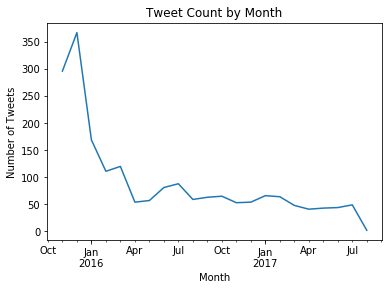

In [106]:
import matplotlib.pyplot as plt
monthly_tweets.plot()
plt.title('Tweet Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets');

It looks like the WeRateDogs account was posting a lot of tweets at the start of the account and has gradually decresed the number of tweets as the account aged.

### Question 2: What is the most popular dog breed on WeRateDogs?

In [107]:
dog_prediction = clean_master.query('dog_status == True')
dog_prediction = dog_prediction.groupby('tweet_id', as_index=False)['confidence'].max()
dog_prediction = dog_prediction.astype({'tweet_id': 'object'})

In [108]:
dog_prediction = clean_master.merge(dog_prediction, how='inner', on=['tweet_id', 'confidence'])

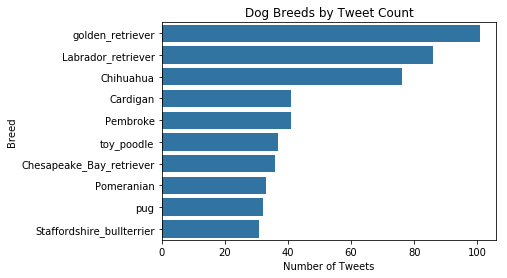

In [109]:
import seaborn as sb
base_color = sb.color_palette()[0]
dog_order = dog_prediction['prediction'].value_counts().head(10)
sb.countplot(data=dog_prediction, y='prediction', color=base_color, order=dog_order.index)
plt.title('Dog Breeds by Tweet Count')
plt.xlabel('Number of Tweets')
plt.ylabel('Breed');

Golden Retriver is the most popular dog breed on WeRateDogs.

### Question 3: What are the top 10 dog names on WeRateDogs?

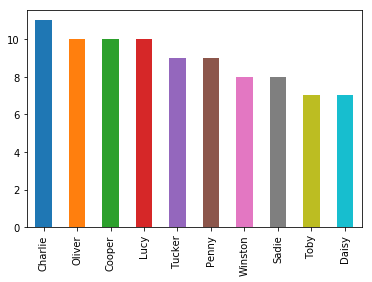

In [110]:
dog_names = clean_master['name'].value_counts()[:10].plot(kind = 'bar')

Charlie and Lucy are the most popular dog names on WeRateDogs.

### Summary of Insights:
1. I analyized the account activity by measuring the numnber of tweets posted by month. After plotting my graph I saw that the account was most active in the fall of 2015 and experienced a sharp decline in tweets at the beginning of 2016 and then gradually tapered down for the remaining of the 2016 into 2017.

2. I wanted to see if there was a trend of a particular dog breed getting more tweets than others. I was able to create a chart that showed me Golden Retrievers had the highest number of tweets at 140.

3. I did an analysis on the top dog names. Since there were so many dog names in the data set I narrowed it down to just look at the top 10 names. Charlie and Lucy were tied at number 1 with over 10 dogs with that name. 